# Data Visualization Project – Pre1

**Author:** Grace (Yuhe) Lin  
**Last Updated:** 2026-02-01  

---

## Skills 
- 1. Data Acquisition
- 2. Data Understanding
- 3. Data Cleaning
- 4. Exploratory Data Analysis (EDA)
- 5. Statistical Reasoning and Interpretation

---

## Objective

The objective of this analysis is to:

- Explore the distribution of disease subtypes  
- Investigate how clinical variables—particularly **disease-specific survival status** and **age**—are associated with **overall survival**  
- Examine the relationship between **patient-level data** and **sample-level data** to better understand the structure and consistency of the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



file_path = r"data/lgg_tcga_pan_can_atlas_2018/data_clinical_patient.txt"

df = pd.read_csv(file_path, sep="\t", comment="#")  

df.head(5)

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
0,TCGA-CS-4938,LGG_IDHmut-non-codel,LGG,334f715e-08dc-4a29-b8e4-b010b829c478,31.0,Female,NaN,NaN,3574.0,-11509.0,...,Yes,0:LIVING,117.500082,0:ALIVE OR DEAD TUMOR FREE,117.500082,NaN,NaN,0:CENSORED,117.500082,EUR
1,TCGA-CS-4941,LGG_IDHwt,LGG,fc222f23-b3b2-4ac0-bc61-e8e8fa5cc160,67.0,Male,NaN,NaN,NaN,-24578.0,...,Yes,1:DECEASED,7.693066,1:DEAD WITH TUMOR,7.693066,NaN,NaN,1:PROGRESSION,0.295887,EUR
2,TCGA-CS-4942,LGG_IDHmut-non-codel,LGG,230f5fa7-aa36-41ea-b40b-08f520767bd5,44.0,Female,NaN,NaN,NaN,-16297.0,...,Yes,1:DECEASED,43.889930,1:DEAD WITH TUMOR,43.889930,NaN,NaN,1:PROGRESSION,38.925601,AFR
3,TCGA-CS-4943,LGG_IDHmut-non-codel,LGG,952dfd5d-e65a-4307-b6a9-2ed2b0d2d9ce,37.0,Male,NaN,NaN,552.0,-13565.0,...,Yes,1:DECEASED,36.361245,1:DEAD WITH TUMOR,36.361245,NaN,NaN,1:PROGRESSION,36.361245,EUR
4,TCGA-CS-4944,LGG_IDHmut-non-codel,LGG,64cd17eb-c778-45e9-b994-02b68182e51b,50.0,Male,NaN,NaN,1828.0,-18494.0,...,Yes,0:LIVING,60.097972,0:ALIVE OR DEAD TUMOR FREE,60.097972,NaN,NaN,0:CENSORED,60.097972,EUR


#  Dataset Overview

- The dataset contains clinical information of patients diagnosed with Lower Grade Glioma (LGG), 
- derived from the TCGA cohort. 
- LGG is a slower-growing type of brain tumor that is usually less aggressive than more severe brain cancers, but it is not completely harmless.
- Each row represents one patient, uniquely identified by PATIENT_ID. 

## Variable Understanding

### (1) Identifier Variables (for indexing)
- **PATIENT_ID**

### (2) Tumor-related Variables
- **SUBTYPE**

### (3) Demographic Variables
- **AGE**
- **SEX**

### (4) Outcome Variables (Survival Status)
- **Overall Survival (OS)**
  - **OS_MONTHS**
  - **OS_STATUS**

- **Disease-Specific Survival (DSS)**
  - **DSS_MONTHS**
  - **DSS_STATUS**

- **Disease-Free Survival (DFS)**
  - **DFS_MONTHS**
  - **DFS_STATUS** *(missing)*

- **Progression-Free Survival (PFS)**
  - **PFS_MONTHS**
  - **PFS_STATUS**


In [2]:
# count missing values
df.isnull().sum()


PATIENT_ID                                      0
SUBTYPE                                         7
CANCER_TYPE_ACRONYM                             0
OTHER_PATIENT_ID                                1
AGE                                             1
SEX                                             1
AJCC_PATHOLOGIC_TUMOR_STAGE                   514
AJCC_STAGING_EDITION                          514
DAYS_LAST_FOLLOWUP                             92
DAYS_TO_BIRTH                                   2
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS            1
ETHNICITY                                      35
FORM_COMPLETION_DATE                            1
HISTORY_NEOADJUVANT_TRTYN                       1
ICD_10                                          1
ICD_O_3_HISTOLOGY                               1
ICD_O_3_SITE                                    1
INFORMED_CONSENT_VERIFIED                       1
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT       100
PATH_M_STAGE                                  514


In [3]:
# distribution of categorical variables
df.select_dtypes(include="object").nunique()


PATIENT_ID                                 514
SUBTYPE                                      3
CANCER_TYPE_ACRONYM                          1
OTHER_PATIENT_ID                           513
SEX                                          2
ETHNICITY                                    2
FORM_COMPLETION_DATE                       170
HISTORY_NEOADJUVANT_TRTYN                    3
ICD_10                                       6
ICD_O_3_HISTOLOGY                            5
ICD_O_3_SITE                                 6
INFORMED_CONSENT_VERIFIED                    1
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT      2
PERSON_NEOPLASM_CANCER_STATUS                2
PRIOR_DX                                     3
RACE                                         4
RADIATION_THERAPY                            2
IN_PANCANPATHWAYS_FREEZE                     2
OS_STATUS                                    2
DSS_STATUS                                   2
DFS_STATUS                                   2
PFS_STATUS   

In [4]:
#Count different tumor subtypes and their frequencies
subtype_freq = df["SUBTYPE"].value_counts().reset_index()
subtype_freq.columns = ["Subtype", "Frequency"]
subtype_freq


,Subtype,Frequency
0,LGG_IDHmut-non-codel,248
1,LGG_IDHmut-codel,167
2,LGG_IDHwt,92


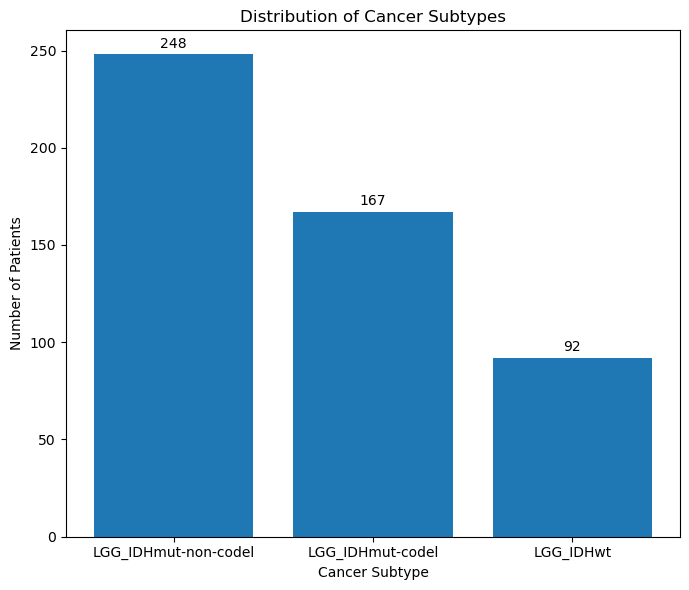

In [5]:
plt.figure(figsize=(7,6))

# bar chart
bars = plt.bar(
    subtype_freq["Subtype"],
    subtype_freq["Frequency"]
)

plt.title("Distribution of Cancer Subtypes")
plt.xlabel("Cancer Subtype")
plt.ylabel("Number of Patients")


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 2,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


## Molecular Subtype Distribution

This bar chart shows the distribution of molecular subtypes of lower-grade glioma (LGG) in the TCGA dataset.  
Three major molecular subtypes are observed:

- **LGG_IDHmut-codel** (IDH-mutant with 1p/19q codeletion)
- **LGG_IDHmut-non-codel** (IDH-mutant without 1p/19q codeletion)
- **LGG_IDHwt** (IDH wild-type)

In [6]:
# Interpretation of DSS by Tumor Subtype

df_dss = df[["SUBTYPE", "DSS_STATUS"]].copy()
df_dss = df_dss.dropna(subset=["DSS_STATUS"])

dss_counts = (
    df_dss
    .groupby(["SUBTYPE", "DSS_STATUS"])
    .size()
    .reset_index(name="Count")
)

dss_counts


,SUBTYPE,DSS_STATUS,Count
0,LGG_IDHmut-codel,0:ALIVE OR DEAD TUMOR FREE,148
1,LGG_IDHmut-codel,1:DEAD WITH TUMOR,18
2,LGG_IDHmut-non-codel,0:ALIVE OR DEAD TUMOR FREE,197
3,LGG_IDHmut-non-codel,1:DEAD WITH TUMOR,44
4,LGG_IDHwt,0:ALIVE OR DEAD TUMOR FREE,42
5,LGG_IDHwt,1:DEAD WITH TUMOR,49


## Survival Outcomes
**DSS_STATUS** reflects tumor-specific survival.

The results indicate that:

- **LGG_IDHmut-codel** has the best prognosis  
- **LGG_IDHmut-non-codel** shows intermediate survival outcomes  
- **LGG_IDHwt** has the poorest prognosis, with more tumor-related deaths than tumor-free cases 

In [7]:
df_age = df[["SUBTYPE", "AGE"]].copy()
df_age.head()


,SUBTYPE,AGE
0,LGG_IDHmut-non-codel,31.0
1,LGG_IDHwt,67.0
2,LGG_IDHmut-non-codel,44.0
3,LGG_IDHmut-non-codel,37.0
4,LGG_IDHmut-non-codel,50.0


In [8]:
# Delete missing age
df_age = df_age.dropna(subset=["AGE"])

# Convert to numeric type (prevent string mixing)
df_age["AGE"] = pd.to_numeric(df_age["AGE"], errors="coerce")

# Clear the NaN generated by the failed conversion
df_age = df_age.dropna(subset=["AGE"])


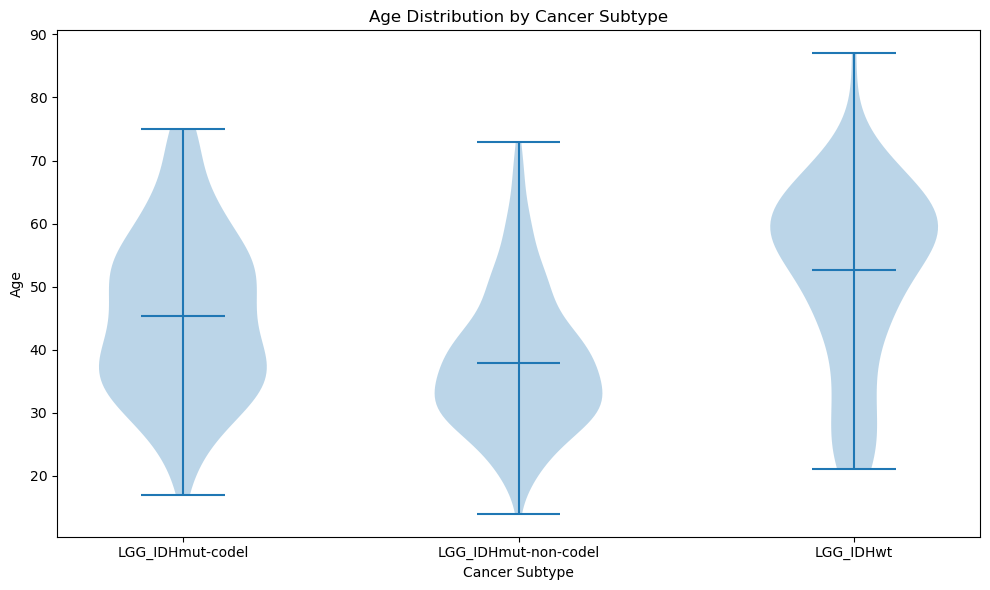

In [9]:
# the age data corresponding to each subtype

groups = []
labels = []

for subtype, group in df.groupby("SUBTYPE"):
    groups.append(group["AGE"].dropna())
    labels.append(subtype)

#  violin plot
plt.figure(figsize=(10,6))
plt.violinplot(groups, showmeans=True)
plt.xticks(range(1, len(labels)+1), labels)
plt.xlabel("Cancer Subtype")
plt.ylabel("Age")
plt.title("Age Distribution by Cancer Subtype")
plt.tight_layout()
plt.show()


## Age Distribution by Tumor Subtype

The violin plot illustrates the age distribution across different glioma molecular subtypes, allowing comparison of patient age at diagnosis between IDH-mutant and IDH wild-type tumors.

- The **LGG_IDHwt** group has the highest median age (approximately **53 years**),  
  with a peak around **60 years**, indicating a higher incidence among middle-aged and older patients.

- The **LGG_IDHmut-non-codel** group shows the lowest median age (around **39 years**).  
  Most patients are concentrated between **30 and 40 years**, with a long right tail, indicating a smaller number of older patients.

- The **LGG_IDHmut-codel** group exhibits the most evenly distributed age profile,  
  ranging from **35 to 55 years**, with a median age of approximately **46 years**.

In [10]:
df_survival = df[["AGE", "OS_MONTHS", "SUBTYPE"]].copy()

# Delete missing values
df_survival = df_survival.dropna()

# Convert to numeric type (prevent string mixing)
df_survival["AGE"] = pd.to_numeric(df_survival["AGE"], errors="coerce")
df_survival["OS_MONTHS"] = pd.to_numeric(df_survival["OS_MONTHS"], errors="coerce")

# Clear the NaN generated by the failed conversion
df_survival = df_survival.dropna()

df_survival.head()


,AGE,OS_MONTHS,SUBTYPE
0,31.0,117.500082,LGG_IDHmut-non-codel
1,67.0,7.693066,LGG_IDHwt
2,44.0,43.889930,LGG_IDHmut-non-codel
3,37.0,36.361245,LGG_IDHmut-non-codel
4,50.0,60.097972,LGG_IDHmut-non-codel


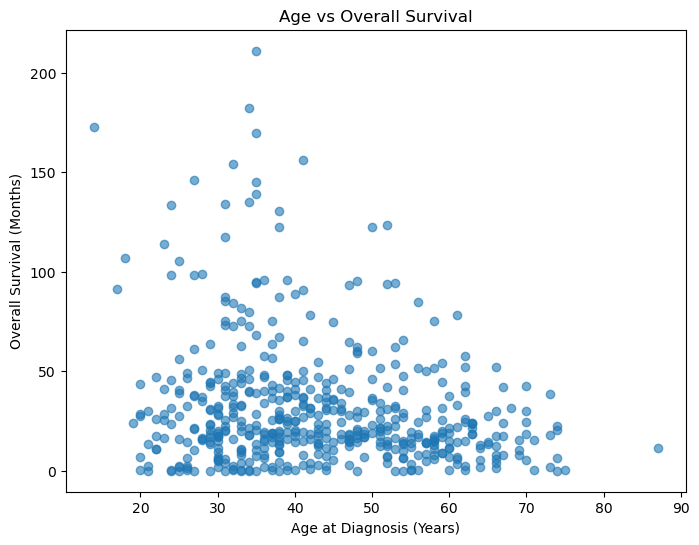

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df_survival["AGE"], df_survival["OS_MONTHS"], alpha=0.6)
plt.xlabel("Age at Diagnosis (Years)")
plt.ylabel("Overall Survival (Months)")
plt.title("Age vs Overall Survival")

plt.show()

## Age and Overall Survival monthes

The scatter plot shows that age at initial diagnosis is broadly distributed between approximately **20 and 75 years**, with a relatively high concentration across this range.

- The majority of patients exhibit an overall survival time below **50 months**.
- A small subset of younger and middle-aged patients (approximately **20–50 years**) demonstrates extended survival exceeding **100 months**, indicating the presence of long-term survivors in this age group.

In [12]:
# Group survival by subtype
groups = []
labels = []

for subtype, group in df_survival.groupby("SUBTYPE"):
    groups.append(group["OS_MONTHS"])
    labels.append(subtype)


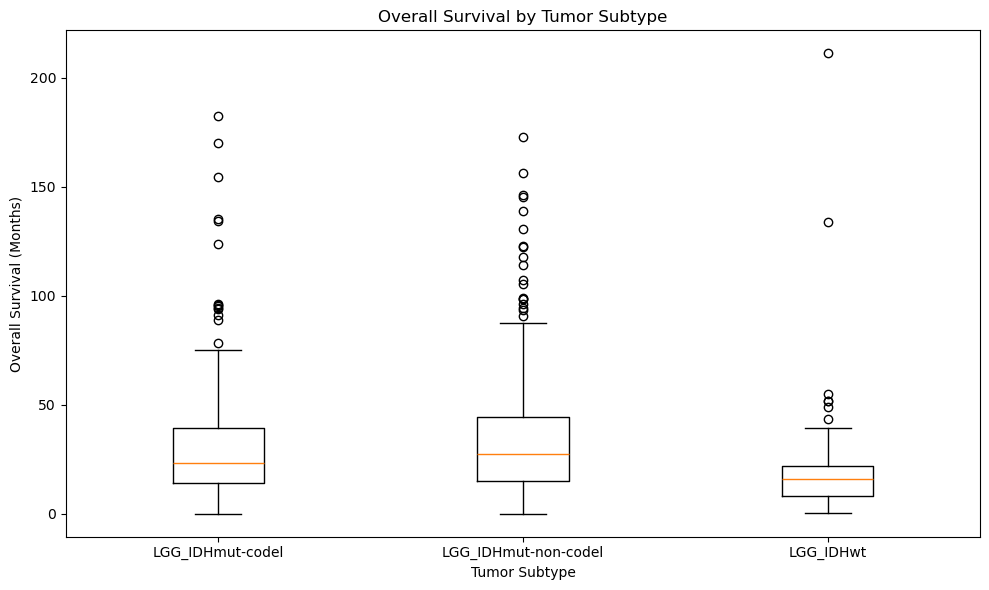

In [13]:
plt.figure(figsize=(10,6))
plt.boxplot(groups, tick_labels=labels, showfliers=True)
plt.xlabel("Tumor Subtype")
plt.ylabel("Overall Survival (Months)")
plt.title("Overall Survival by Tumor Subtype")

plt.tight_layout()
plt.show()


## Overall Survival by Tumor Subtype

The box plot indicates that the median overall survival time across the three tumor subtypes is approximately **25 months**.

- **LGG_IDHwt** exhibits the shortest survival outcomes,  
  with most observations tightly concentrated between **10 and 25 months**, indicating limited variability and poorer prognosis.

- In contrast, **LGG_IDHmut-non-codel** shows the longest overall survival,  
  with the majority of patients distributed between approximately **10 and 45 months**, suggesting a comparatively better prognosis and greater variability in survival outcomes.


In [14]:
# Load data_clinical_sample.txt

file_path = r"data/lgg_tcga_pan_can_atlas_2018/data_clinical_sample.txt"

# skip first 4 lines
df_sample = pd.read_csv(
    file_path,
    sep="\t",
    skiprows=4
)

# View data dimensions
print("Dataset shape:", df_sample.shape)


df_sample.head(10)

Dataset shape: (514, 19)


,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE,TBL_SCORE
0,TCGA-CS-4938,TCGA-CS-4938-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G2,No,Yes,CS,CNS,1.0,Primary,0.3030,0.00,Matched,0.466667,Thomas Jefferson University,31.0
1,TCGA-CS-4941,TCGA-CS-4941-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,7.0,Primary,0.2736,0.00,Matched,1.466667,Thomas Jefferson University,26.0
2,TCGA-CS-4942,TCGA-CS-4942-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,2.0,Primary,0.2810,0.02,Matched,0.866667,Thomas Jefferson University,22.0
3,TCGA-CS-4943,TCGA-CS-4943-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,5.0,Primary,0.2751,0.25,Matched,0.800000,Thomas Jefferson University,130.0
4,TCGA-CS-4944,TCGA-CS-4944-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G2,No,Yes,CS,CNS,1.0,Primary,0.2697,0.04,Matched,0.700000,Thomas Jefferson University,20.0
5,TCGA-CS-5390,TCGA-CS-5390-01,ODG,Glioma,Oligodendroglioma,Oligodendroglioma,G2,No,Yes,CS,CNS,2.0,Primary,0.2623,0.10,Matched,1.466667,Thomas Jefferson University,6.0
6,TCGA-CS-5393,TCGA-CS-5393-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,0.0,Primary,0.2715,0.00,Matched,0.800000,Thomas Jefferson University,49.0
7,TCGA-CS-5394,TCGA-CS-5394-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,1.0,Primary,0.3295,0.16,Matched,0.733333,Thomas Jefferson University,5.0
8,TCGA-CS-5395,TCGA-CS-5395-01,ODG,Glioma,Oligodendroglioma,Oligodendroglioma,G2,No,Yes,CS,CNS,8.0,Primary,0.2735,0.07,Matched,1.400000,Thomas Jefferson University,28.0
9,TCGA-CS-5396,TCGA-CS-5396-01,ODG,Glioma,Oligodendroglioma,Oligodendroglioma,G3,No,Yes,CS,CNS,6.0,Primary,0.2798,0.00,Matched,0.933333,Thomas Jefferson University,14.0


## Connection Between Patient-Level and Sample-Level Data

- A single **patient** may have **multiple tumor samples** collected at different time points, from different anatomical locations, or at different stages of treatment.
- Each **sample** has its own histological and molecular characteristics.
- However, all samples derived from the same patient share the **same clinical background and survival outcomes** recorded at the patient level.

In [15]:
import pandas as pd
import numpy as np

file_path = r"data\lgg_tcga_pan_can_atlas_2018\data_mrna_seq_v2_rsem.txt"

df_mrna = pd.read_csv(file_path, sep="\t", comment="#")

df_mrna.head(10)


,Hugo_Symbol,Entrez_Gene_Id,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,8.7141,36.4493,11.8131,8.6116,0.000,5.3382,3.7845,8.3071,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
2,UBE2Q2P2,100134869,22.7523,21.1767,11.0242,5.0835,30.261,27.8886,8.7230,15.4466,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
3,HMGB1P1,10357,268.5760,156.6870,185.1380,269.8360,216.341,159.7590,198.1880,208.5410,...,127.7470,106.8290,205.5170,184.4080,125.5470,124.9190,133.7390,120.9240,107.2540,143.0060
4,NaN,10431,845.8150,390.2690,621.4530,835.7290,812.508,576.9050,551.9470,607.8960,...,564.3620,603.3720,570.9130,760.7160,875.1410,658.2210,662.6510,524.7240,705.1280,748.5820
5,NaN,136542,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,NaN,155060,182.5050,325.0520,131.1420,83.4750,80.696,216.5220,332.0560,244.5630,...,1156.7300,359.9710,637.6200,831.8830,441.2860,540.5120,610.1550,837.7600,805.7200,1194.3300
7,RNU12-2P,26823,0.4196,1.7253,0.0000,0.3261,0.000,2.5559,0.8069,0.6691,...,1.1919,2.5660,1.2019,1.1961,0.6461,1.0557,2.1515,3.2693,0.4931,1.1342
8,SSX9P,280660,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,NaN,317712,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# Assignment 1
## Part A

## Executive Summary

The mRNA expression dataset was quality checked and cleaned prior to analysis to ensure consistency, interpretability, and suitability for downstream statistical analysis.

The cleaning process included:

- Inspecting dataset structure and variable types
- Ensuring expression variables are numeric
- Handling missing values
- Removing genes with excessive missing or zero expression
- Identifying and removing duplicated gene entries
- Removing genes with no expression across all samples

These steps reduce noise, improve biological interpretability, and ensure that retained genes contain meaningful expression information across tumor samples.


### ✅ 1. Inspect Dataset Structure and Variables

In [16]:
# Understand dataset dimensions and structure before cleaning
df_mrna.shape
df_mrna.info()

# Inspect data types of first few variables
df_mrna.dtypes.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20531 entries, 0 to 20530
Columns: 516 entries, Hugo_Symbol to TCGA-WY-A85E-01
dtypes: float64(514), int64(1), object(1)
memory usage: 80.8+ MB


Hugo_Symbol         object
Entrez_Gene_Id       int64
TCGA-CS-4938-01    float64
TCGA-CS-4941-01    float64
TCGA-CS-4942-01    float64
dtype: object

### ✅ 2. Check and Correct Data Types

In [17]:
# Expression columns start from the third column onward
expression_cols = df_mrna.columns[2:]

# Ensure all expression values are numeric
df_mrna[expression_cols] = df_mrna[expression_cols].apply(
    pd.to_numeric, errors="coerce"
)


### ✅ 3. Missing Data Check and Handling

In [18]:
# Check total missing values
missing_total = df_mrna.isnull().sum().sum()
missing_total

np.int64(13)

In [19]:
# Check missingness per gene (row level)
missing_per_row = df_mrna.isnull().sum(axis=1)
missing_per_row.describe()

count    20531.000000
mean         0.000633
std          0.025156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

In [20]:
# Remove genes with more than 20% missing expression values
threshold = int(0.2 * len(expression_cols))
df_mrna = df_mrna[missing_per_row <= threshold]

# Fill remaining missing values with 0
df_mrna[expression_cols] = df_mrna[expression_cols].fillna(0)


### ✅ 4. Remove Irrelevant or Low-Information Genes

In [21]:
# Remove genes without valid gene symbols
df_mrna = df_mrna.dropna(subset=["Hugo_Symbol"])

# Remove genes with more than 20% zero expression across samples
zero_ratio = (df_mrna[expression_cols] == 0).mean(axis=1)
df_mrna = df_mrna[zero_ratio <= 0.2]

### ✅ 5. Duplicate Data Check

In [22]:
# Check fully duplicated rows
df_mrna.duplicated().sum()

np.int64(0)

In [23]:
# Check duplicated gene symbols
df_mrna["Hugo_Symbol"].duplicated().sum()

np.int64(7)

In [24]:
# Keep only one entry per gene
df_mrna = df_mrna.drop_duplicates(subset=["Hugo_Symbol"])

### ✅ 6. Remove Genes with No Expression Across All Samples

In [25]:
# Remove genes with zero expression in all samples
non_zero_mask = (df_mrna[expression_cols].sum(axis=1) > 0)
df_mrna = df_mrna[non_zero_mask]

### ✅ 7. Final Clean Dataset

In [26]:
# Create cleaned dataset
df_mrna_clean = df_mrna.copy()

# Display dataset dimensions after cleaning
print("Cleaned mRNA dataset shape:")
print(df_mrna_clean.shape)

# Display first 10 rows
df_mrna_clean.head(10)

Cleaned mRNA dataset shape:
(16907, 516)


,Hugo_Symbol,Entrez_Gene_Id,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
2,UBE2Q2P2,100134869,22.7523,21.1767,11.0242,5.0835,30.2610,27.8886,8.7230,15.4466,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
3,HMGB1P1,10357,268.5760,156.6870,185.1380,269.8360,216.3410,159.7590,198.1880,208.5410,...,127.7470,106.8290,205.5170,184.4080,125.5470,124.9190,133.7390,120.9240,107.2540,143.0060
7,RNU12-2P,26823,0.4196,1.7253,0.0000,0.3261,0.0000,2.5559,0.8069,0.6691,...,1.1919,2.5660,1.2019,1.1961,0.6461,1.0557,2.1515,3.2693,0.4931,1.1342
10,EZHIP,340602,2.0978,3.4507,1.7301,1.3043,3.0261,8.7631,2.8243,2.0074,...,12.5149,7.6979,1.2019,10.1668,9.6915,7.3898,11.1876,13.4859,7.3964,5.6711
12,SRP14P1,390284,12.5865,15.1829,14.8789,10.4344,23.2001,10.5888,9.6833,5.6875,...,5.9595,5.8651,4.8077,8.9707,4.8457,5.2784,8.6059,7.3559,12.8205,4.9149
22,HSPB1P1,653553,58.3176,120.7730,38.7543,24.4556,166.9400,18.6216,27.4359,53.5296,...,586.4120,51.6862,119.5910,146.5220,44.5808,36.9491,23.6661,42.9097,146.9430,40.8318
25,ANKRD20A20P,728788,2.0978,1.3803,0.3460,4.5650,0.0000,0.3651,4.8416,1.0037,...,0.0000,1.4663,0.6010,0.5980,1.6152,7.3898,8.6059,10.2166,1.9724,1.8904
27,GTPBP6,8225,572.2680,734.2990,674.7400,777.0350,830.6640,769.6940,422.4330,376.7150,...,1492.2500,912.3900,1170.6700,626.7530,1043.4500,1220.3700,723.3220,1089.5000,1439.8400,848.3930
28,EFCAB12,90288,33.5641,108.3510,13.1488,4.2390,14.1218,2.1908,3.2278,6.0221,...,16.6865,9.8974,3.0048,8.3727,16.7986,3.6949,6.8847,21.2505,36.9822,6.8053
29,A1BG,1,94.1095,72.2326,74.4533,29.9858,24.7132,85.4696,46.3789,37.9659,...,149.7740,25.2456,351.2080,215.5120,67.6466,78.3267,85.7186,125.9500,301.2570,129.6630


#### Hugo Symbol

The **Hugo Symbol** represents the standardized gene name assigned by the HUGO Gene Nomenclature Committee (HGNC). It is a **human-readable identifier** commonly used in biological literature and clinical research (e.g., *TP53*, *EGFR*, *IDH1*). Hugo symbols make interpretation and communication of results easier.

However, gene names may change over time as biological knowledge evolves, which can lead to inconsistencies across datasets.

#### Entrez Gene ID

The **Entrez Gene ID** is a unique numerical identifier assigned by the National Center for Biotechnology Information (NCBI). Each Entrez ID corresponds to a single gene and remains stable even if the gene name changes. This makes it reliable for database integration, data merging, and computational analysis.

#### Why Both Are Included

- **Entrez Gene ID** ensures uniqueness and consistency for computational processing.
- **Hugo Symbol** improves readability and interpretation when presenting biological findings.

In this dataset, each row represents a gene defined by these identifiers, while the remaining columns contain expression values for individual tumor samples.


## Part B

In [27]:
# Keep only relevant variables
df_patient = df[["PATIENT_ID", "SUBTYPE"]]

df_patient.head()

,PATIENT_ID,SUBTYPE
0,TCGA-CS-4938,LGG_IDHmut-non-codel
1,TCGA-CS-4941,LGG_IDHwt
2,TCGA-CS-4942,LGG_IDHmut-non-codel
3,TCGA-CS-4943,LGG_IDHmut-non-codel
4,TCGA-CS-4944,LGG_IDHmut-non-codel


In [28]:
# Check dataset dimensions and data types
df_patient.shape
df_patient.info()
df_patient.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PATIENT_ID  514 non-null    object
 1   SUBTYPE     507 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


PATIENT_ID    object
SUBTYPE       object
dtype: object

In [29]:
# Inspect subtype categories
df_patient["SUBTYPE"].unique()


array(['LGG_IDHmut-non-codel', 'LGG_IDHwt', 'LGG_IDHmut-codel', nan],
      dtype=object)

In [30]:
# Check missing values
df_patient.isnull().sum()

PATIENT_ID    0
SUBTYPE       7
dtype: int64

In [31]:
# Remove rows with missing patient ID or subtype
df_patient = df_patient.dropna(subset=["PATIENT_ID", "SUBTYPE"])

In [32]:
# Check duplicated patient IDs
df_patient["PATIENT_ID"].duplicated().sum()

np.int64(0)

In [33]:
# Remove duplicated patient entries if present
df_patient = df_patient.drop_duplicates(subset=["PATIENT_ID"])

In [34]:
# Create cleaned dataset
df_patient_clean = df_patient.copy()

# Display dataset dimensions
print("Cleaned patient dataset shape:")
print(df_patient_clean.shape)

# Display first 10 rows
df_patient_clean.head(10)

Cleaned patient dataset shape:
(507, 2)


,PATIENT_ID,SUBTYPE
0,TCGA-CS-4938,LGG_IDHmut-non-codel
1,TCGA-CS-4941,LGG_IDHwt
2,TCGA-CS-4942,LGG_IDHmut-non-codel
3,TCGA-CS-4943,LGG_IDHmut-non-codel
4,TCGA-CS-4944,LGG_IDHmut-non-codel
5,TCGA-CS-5390,LGG_IDHmut-codel
6,TCGA-CS-5393,LGG_IDHmut-non-codel
7,TCGA-CS-5394,LGG_IDHmut-non-codel
8,TCGA-CS-5395,LGG_IDHwt
9,TCGA-CS-5396,LGG_IDHmut-codel


## Part C

In [35]:
# Keep only variables required for downstream analysis
df_sample = df_sample[["PATIENT_ID", "SAMPLE_ID"]].copy()

df_sample.head()

,PATIENT_ID,SAMPLE_ID
0,TCGA-CS-4938,TCGA-CS-4938-01
1,TCGA-CS-4941,TCGA-CS-4941-01
2,TCGA-CS-4942,TCGA-CS-4942-01
3,TCGA-CS-4943,TCGA-CS-4943-01
4,TCGA-CS-4944,TCGA-CS-4944-01


In [36]:
# Check dimensions and data types
df_sample.shape
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PATIENT_ID  514 non-null    object
 1   SAMPLE_ID   514 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [37]:
# Check missing values
df_sample.isnull().sum()

PATIENT_ID    0
SAMPLE_ID     0
dtype: int64

In [38]:
# Check duplicates
df_sample.duplicated().sum()

np.int64(0)

In [39]:
# Create cleaned dataset
df_sample_clean = df_sample.copy()

# Display dataset size after cleaning
print("Number of rows after cleaning:", df_sample_clean.shape[0])

# Display first 10 rows
df_sample_clean.head(10)


Number of rows after cleaning: 514


,PATIENT_ID,SAMPLE_ID
0,TCGA-CS-4938,TCGA-CS-4938-01
1,TCGA-CS-4941,TCGA-CS-4941-01
2,TCGA-CS-4942,TCGA-CS-4942-01
3,TCGA-CS-4943,TCGA-CS-4943-01
4,TCGA-CS-4944,TCGA-CS-4944-01
5,TCGA-CS-5390,TCGA-CS-5390-01
6,TCGA-CS-5393,TCGA-CS-5393-01
7,TCGA-CS-5394,TCGA-CS-5394-01
8,TCGA-CS-5395,TCGA-CS-5395-01
9,TCGA-CS-5396,TCGA-CS-5396-01


## Part D

In [40]:
# Merge sample data with patient subtype information
df_sample_patient = pd.merge(
    df_sample_clean,
    df_patient_clean,
    on="PATIENT_ID",
    how="inner"
)

df_sample_patient.head()


,PATIENT_ID,SAMPLE_ID,SUBTYPE
0,TCGA-CS-4938,TCGA-CS-4938-01,LGG_IDHmut-non-codel
1,TCGA-CS-4941,TCGA-CS-4941-01,LGG_IDHwt
2,TCGA-CS-4942,TCGA-CS-4942-01,LGG_IDHmut-non-codel
3,TCGA-CS-4943,TCGA-CS-4943-01,LGG_IDHmut-non-codel
4,TCGA-CS-4944,TCGA-CS-4944-01,LGG_IDHmut-non-codel


In [43]:
# Ensure consistent column naming for merging
df_mrna_clean = df_mrna_clean.rename(columns={"Sample_ID":"SAMPLE_ID" })

In [44]:
# Transpose expression data so samples become rows
df_expr_t = df_mrna_clean.set_index("Hugo_Symbol")
df_expr_t = df_expr_t.T
df_expr_t.index.name = "SAMPLE_ID"
df_expr_t.reset_index(inplace=True)

df_expr_t.head()

Hugo_Symbol,SAMPLE_ID,UBE2Q2P2,HMGB1P1,RNU12-2P,EZHIP,SRP14P1,HSPB1P1,ANKRD20A20P,GTPBP6,EFCAB12,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,Entrez_Gene_Id,1.001349e+08,10357.000,26823.0000,340602.0000,390284.0000,653553.0000,728788.0000,8225.000,90288.0000,...,9183.000,55055.0000,11130.0000,7789.0000,158586.000,79364.00,79699.00,7791.00,23140.00,26009.000
1,TCGA-CS-4938-01,2.275230e+01,268.576,0.4196,2.0978,12.5865,58.3176,2.0978,572.268,33.5641,...,276.065,80.1636,50.3461,64.1913,523.180,1311.52,1495.70,1598.91,1171.81,836.165
2,TCGA-CS-4941-01,2.117670e+01,156.687,1.7253,3.4507,15.1829,120.7730,1.3803,734.299,108.3510,...,301.242,187.2980,110.4210,105.9350,467.564,1226.71,1751.21,3889.92,1707.73,1015.530
3,TCGA-CS-4942-01,1.102420e+01,185.138,0.0000,1.7301,14.8789,38.7543,0.3460,674.740,13.1488,...,320.415,120.0310,186.5050,115.2250,454.325,1102.42,1586.16,2214.53,1423.88,706.920
4,TCGA-CS-4943-01,5.083500e+00,269.836,0.3261,1.3043,10.4344,24.4556,4.5650,777.035,4.2390,...,436.940,667.4480,1183.6500,89.0183,491.068,1288.32,1760.15,2131.55,1916.99,689.321


In [45]:
# Merge expression data with sample-patient-subtype data
df_final = pd.merge(
    df_sample_patient,
    df_expr_t,
    on= "SAMPLE_ID",
    how= "inner"
)

In [46]:
print("Final dataset shape:", df_final.shape)

df_final.head(10)

Final dataset shape: (507, 16910)


,PATIENT_ID,SAMPLE_ID,SUBTYPE,UBE2Q2P2,HMGB1P1,RNU12-2P,EZHIP,SRP14P1,HSPB1P1,ANKRD20A20P,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-CS-4938,TCGA-CS-4938-01,LGG_IDHmut-non-codel,22.7523,268.576,0.4196,2.0978,12.5865,58.3176,2.0978,...,276.065,80.1636,50.3461,64.1913,523.180,1311.52,1495.700,1598.91,1171.810,836.165
1,TCGA-CS-4941,TCGA-CS-4941-01,LGG_IDHwt,21.1767,156.687,1.7253,3.4507,15.1829,120.7730,1.3803,...,301.242,187.2980,110.4210,105.9350,467.564,1226.71,1751.210,3889.92,1707.730,1015.530
2,TCGA-CS-4942,TCGA-CS-4942-01,LGG_IDHmut-non-codel,11.0242,185.138,0.0000,1.7301,14.8789,38.7543,0.3460,...,320.415,120.0310,186.5050,115.2250,454.325,1102.42,1586.160,2214.53,1423.880,706.920
3,TCGA-CS-4943,TCGA-CS-4943-01,LGG_IDHmut-non-codel,5.0835,269.836,0.3261,1.3043,10.4344,24.4556,4.5650,...,436.940,667.4480,1183.6500,89.0183,491.068,1288.32,1760.150,2131.55,1916.990,689.321
4,TCGA-CS-4944,TCGA-CS-4944-01,LGG_IDHmut-non-codel,30.2610,216.341,0.0000,3.0261,23.2001,166.9400,0.0000,...,272.853,57.3244,56.4872,42.3654,323.793,1012.73,1225.070,1692.60,729.794,456.941
5,TCGA-CS-5390,TCGA-CS-5390-01,LGG_IDHmut-codel,27.8886,159.759,2.5559,8.7631,10.5888,18.6216,0.3651,...,337.380,191.2840,422.8210,78.1378,887.631,1622.64,1065.810,1954.91,2093.290,457.873
6,TCGA-CS-5393,TCGA-CS-5393-01,LGG_IDHmut-non-codel,8.7230,198.188,0.8069,2.8243,9.6833,27.4359,4.8416,...,240.871,77.3694,70.2038,52.0476,392.576,1318.94,1648.980,1749.04,1979.420,845.269
7,TCGA-CS-5394,TCGA-CS-5394-01,LGG_IDHmut-non-codel,15.4466,208.541,0.6691,2.0074,5.6875,53.5296,1.0037,...,263.633,228.8090,218.1330,128.8060,609.234,1498.83,1402.480,1807.63,2348.280,423.219
8,TCGA-CS-5395,TCGA-CS-5395-01,LGG_IDHwt,12.7776,255.288,0.0000,0.0000,8.8862,148.4730,0.0000,...,269.917,244.3430,169.2070,89.6021,425.425,1070.41,1749.830,1755.76,1288.120,851.590
9,TCGA-CS-5396,TCGA-CS-5396-01,LGG_IDHmut-codel,19.9402,129.719,0.0000,2.7609,10.4302,61.6612,1.5339,...,426.720,105.0230,193.8800,152.1590,662.628,1255.00,900.069,2137.59,2317.050,397.577


In [49]:
# Export Final Dataset to CSV
df_final.to_csv("LGG_cleaned_expression_dataset.csv", index=False)